# <font color='red'>Model</font>: Decition Tree

## Objective
- The objective of this project is to create a decision tree regressor model to forecast housing prices utilizing the AMES housing dataset. Our primary goal is to construct a model that achieves the highest R-squared value on the test set. 

### Primary Goal
- We will preprocess the data using pipelines and a column transformer. 

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""SickitLearn Imports in order"""
# -Preprocessing Imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# -Processors Importation
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# -Machine Learning algorithm
from sklearn.tree import DecisionTreeRegressor as DTR

#- Metrics
from sklearn.metrics import r2_score

print("Imports Running")

Imports Running


In [2]:
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
print("Sklearn Output COnfigured")

Sklearn Output COnfigured


## Load Dataset

In [3]:
# Load your file:
df = pd.read_csv("Data_File_[AmesHousing].csv")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",None)

In [4]:
df.head(10)

PID MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
0  907227090        RL          60.0      7200   Pave   NaN    AllPub   
1  527108010        RL         134.0     19378   Pave   NaN    AllPub   
2  534275170        RL           NaN     12772   Pave   NaN    AllPub   
3  528104050        RL         114.0     14803   Pave   NaN    AllPub   
4  533206070        FV          32.0      3784   Pave  Pave    AllPub   
5  908102320        RL         134.0     17755   Pave   NaN    AllPub   
6  528174080        RL          43.0      7052   Pave   NaN    AllPub   
7  532377130        RL          80.0     10000   Pave   NaN    AllPub   
8  528102030        RL          96.0     12444   Pave   NaN    AllPub   
9  534127170        RL           NaN      9156   Pave   NaN    AllPub   

  Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0      CollgCr      1Fam      1Story             5             8        1972   
1      Gilbert      1Fam      2Story             7             5        2005   
2        NAmes      1Fam      1Story             6             8        1960   
3      NridgHt      1Fam      1Story            10             5        2007   
4      Somerst    TwnhsE      1Story             8             5        2006   
5      Edwards      1Fam      1Story             5             4        1959   
6      NridgHt    TwnhsE      1Story             7             5        2005   
7       Sawyer      1Fam      1Story             5             6        1961   
8      NridgHt      1Fam      1Story             8             5        2008   
9       NWAmes      1Fam      1Story             6             7        1968   

   Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  Total Bsmnt Sqft  \
0            1972         TA         TA          427.0             864.0   
1            2006         Gd         TA         1335.0            1392.0   
2            1998         TA         Gd          460.0             958.0   
3            2008         Ex         TA          442.0            2078.0   
4            2007         Gd         TA         1451.0            1511.0   
5            1959         TA         TA         1290.0            1466.0   
6            2005         Gd         TA          705.0            1364.0   
7            1983         TA         TA          270.0             864.0   
8            2008         Ex         TA          596.0            1932.0   
9            1968         TA         TA         1489.0            1489.0   

  Central Air  Living Area Sqft  Bedroom  Kitchen  Total Rooms Garage Type  \
0           Y             864.0        3        1            5      Detchd   
1           Y            2462.0        4        1            9      Attchd   
2           Y             958.0        2        1            5      Attchd   
3           Y            2084.0        2        1            7      Attchd   
4           Y            1565.0        2        1            5      Attchd   
5           Y            1466.0        3        1            6      Attchd   
6           Y            1364.0        2        1            6      Attchd   
7           Y            1144.0        3        1            6      Attchd   
8           Y            1932.0        2        1            7      Attchd   
9           Y            1489.0        3        1            7      Attchd   

   Garage Yr Blt  Garage Cars  Garage Area Garage Qual Garage Cond  \
0         1977.0          1.0        297.0          TA          TA   
1         2006.0          2.0        576.0          TA          TA   
2         1960.0          1.0        301.0          TA          TA   
3         2007.0          3.0       1220.0          TA          TA   
4         2006.0          2.0        476.0          TA          TA   
5         1959.0          2.0        528.0          TA          TA   
6         2005.0          2.0        484.0          TA          TA   
7         1961.0          1.0        264.0          TA          TA  

In [5]:
for i in df.columns:
    print(f"\nColumn: {i}")
    print(df[i].value_counts().sum)


Column: PID
<bound method NDFrame._add_numeric_operations.<locals>.sum of 907227090     1
905201080     1
916403290     1
903425280     1
906392110     1
535450100     1
903455140     1
527404180     1
908250040     1
527404120     1
905451300     1
903234050     1
905478140     1
527127150     1
909281020     1
527376090     1
528292020     1
527210060     1
534275100     1
527425035     1
527356040     1
534151180     1
535476350     1
909253190     1
535354070     1
906380040     1
528387050     1
528477070     1
909276210     1
532354060     1
908127100     1
914478020     1
527162080     1
527404050     1
535354200     1
528480090     1
527454120     1
528228540     1
916455010     1
534225110     1
902304060     1
907126030     1
535402120     1
528235190     1
531375090     1
527405130     1
910201110     1
534403080     1
528108020     1
906201050     1
909253010     1
907175080     1
533254100     1
908102290     1
527301280     1
905104180     1
911370530     1
535452140    

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     21
780.0     19
1008.0    19
384.0     19
960.0     18
756.0     17
894.0     17
832.0     17
546.0     16
848.0     16
600.0     16
936.0     16
720.0     16
483.0     14
630.0     14
840.0     13
952.0     13
624.0     12
988.0     12
796.0     11
876.0     11
784.0     11
884.0     10
1056.0    10
928.0      9
738.0      9
858.0      9
855.0      9
896.0      8
925.0      8
970.0      8
1728.0     8
992.0      8
1073.0     8
990.0      8
660.0      7
910.0      7
684.0      7
1216.0     7
845.0      7
793.0      7
1080.0     7
1100.0     7
698.0      7
572.0      7
847.0      7
972.0      7
1362.0     7
1208.0     7
882.0      7
686.0      7
1054.0     7
926.0      7
1168.0     7
1057.0     7
1200.0     7
1092.0     7
725.0      6
744.0      6
825.0      6
1392.0     6
920.0      6
1248.0     6
676.0      6
585.0      6
54

Name: Total Bsmnt Sqft, dtype: int64>

Column: Central Air
<bound method NDFrame._add_numeric_operations.<locals>.sum of Y    2734
N     196
Name: Central Air, dtype: int64>

Column: Living Area Sqft
<bound method NDFrame._add_numeric_operations.<locals>.sum of 864.0     41
1092.0    26
1040.0    25
1456.0    20
1200.0    18
894.0     15
912.0     14
816.0     14
848.0     13
1728.0    13
960.0     12
987.0     12
936.0     12
988.0     11
1344.0    11
1337.0    10
1224.0    10
1440.0     9
1218.0     9
1152.0     9
1680.0     9
1302.0     9
1358.0     8
1560.0     8
1392.0     8
1479.0     8
1072.0     8
1430.0     8
1324.0     8
1694.0     8
990.0      8
1494.0     8
1652.0     8
1056.0     7
1008.0     7
1382.0     7
1144.0     7
1422.0     7
1604.0     7
1484.0     7
1646.0     7
630.0      7
1768.0     7
882.0      7
1362.0     7
1374.0     7
1792.0     7
1656.0     7
1436.0     6
1501.0     6
1664.0     6
1432.0     6
1073.0     6
1320.0     6
1710.0     6
1216.0     6
925.0     

<bound method NDFrame._add_numeric_operations.<locals>.sum of 135000.0    34
140000.0    33
130000.0    29
155000.0    28
145000.0    26
160000.0    23
110000.0    21
185000.0    21
127000.0    20
200000.0    20
120000.0    20
170000.0    20
115000.0    19
190000.0    19
125000.0    19
150000.0    18
165000.0    17
180000.0    17
143000.0    17
139000.0    17
128000.0    17
250000.0    16
144000.0    16
148000.0    15
147000.0    15
137000.0    15
119000.0    15
215000.0    15
100000.0    15
132000.0    14
175000.0    14
173000.0    14
105000.0    14
141000.0    14
220000.0    13
124000.0    13
129000.0    13
230000.0    13
176000.0    12
174000.0    12
146000.0    12
225000.0    12
235000.0    12
260000.0    12
152000.0    12
123000.0    12
137500.0    11
126000.0    11
133000.0    11
158000.0    11
240000.0    11
178000.0    11
157000.0    11
153000.0    11
113000.0    11
127500.0    11
159000.0    11
108000.0    11
205000.0    10
122000.0    10
149900.0    10
138000.0    10
184000.0

In [6]:
print("There are:",df.duplicated().sum(),"duplicates")

There are: 0 duplicates


In [7]:
df.isna().sum()

PID                    0
MS Zoning              0
Lot Frontage         490
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

## Start Preprocessing

In [8]:
# Make a list of features to drop
drop_from_model = ['Utilities', # Quasi-constant/To many similar values
                   "Street", # Quasi-constant
                   'MS Zoning', # Stakeholder can't change/Cannot be changed
                   'Lot Frontage',  # Stakeholder can't change
                   'Lot Area', # Stakeholder can't change
                   'Neighborhood',  # Stakeholder can't change
                   'Year Built'] # Stakeholder can't change

- **Define Features/Target** 

In [9]:
# Define features matrix
X = df.drop(columns=[*drop_from_model,"SalePrice"])
# Define target
y = df["SalePrice"]

- **Perform Split**

In [10]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state= 42)
# Preview training data
X_train.set_index("PID",inplace= True)
X_train.head()

Alley Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                 
905475520   NaN      1Fam      1Story             4             5   
909254010   NaN      1Fam      2Story             7             8   
531450090   NaN      1Fam      1Story             6             5   
903400040  Pave      1Fam      2Story             6             6   
527107130   NaN      1Fam        SLvl             7             5   

           Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                              
905475520            1994         TA         TA            0.0   
909254010            1990         TA         TA          600.0   
531450090            1991         TA         TA           78.0   
903400040            1950         TA         TA          764.0   
527107130            1997         TA         TA          100.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bedroom  Kitchen  \
PID                                                                           
905475520               0.0           N             943.0        3        1   
909254010             600.0           Y            1228.0        3        1   
531450090            1278.0           Y            1294.0        3        1   
903400040             764.0           Y            1824.0        3        1   
527107130             384.0           Y            1628.0        3        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
905475520            5      Detchd         1958.0          1.0        308.0   
909254010            6      Detchd         1918.0          1.0        215.0   
531450090            6      Attchd         1991.0          2.0        496.0   
903400040            8      Detchd         1940.0          2.0        520.0   
527107130            7     BuiltIn         1996.0          2.0        390.0   

          Garage Qual Garage Cond Paved Drive  Fence  Month  Year  \
PID                                                                 
905475520          TA          TA           N    NaN      8  2007   
909254010          Fa          TA           Y  MnPrv      5  2009   
531450090          TA          TA           Y   GdWo      6  2008   
903400040          TA          TA           N  GdPrv      7  2007   
527107130          TA          TA           Y    NaN      6  2009   

           Total Full Baths  Total Half Baths  
PID                                            
905475520               1.0               0.0  
909254010               1.0               0.0  
531450090               3.0               0.0  
903400040               1.0               0.0  
527107130               2.0               1.0

- **Work in "Numeric" Features:**

In [11]:
# Selct Numeric Data column
Numeric = X_train.select_dtypes("number").columns

# Pipeline processors in order
Numeric_imputer = SimpleImputer(strategy="median")
STD = StandardScaler()

# make_pipeline
Numeric_pipeline = make_pipeline(Numeric_imputer,STD)

# make it a tuple
Numeric_Tuple = ("Numeric",Numeric_pipeline,Numeric)
Numeric_Tuple

('Numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
        'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
        'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
        'Year', 'Total Full Baths', 'Total Half Baths'],
       dtype='object'))

- **Work in "Ordinal" features:**

In [12]:
# We work in ordinal features because this could also be considered categorical
# we have to select this columns manually, save them in a list, and drop them
# when use the selector to work in the real Categorical Columns.

# Ordinal Columns/Values
Ord_columns = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
ordinal_values= ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']


# Ordinal Processors
ord_imputer = SimpleImputer(strategy="constant", fill_value="NA")


#OrdinalEncoder Process
# -Since we have 4 columns we need to apply the 'ordinal_values' 4 times
Ordinal_Order = [ordinal_values, ordinal_values,
                 ordinal_values, ordinal_values]

# -Apply the list in the encoder
ordinal_encoder = OrdinalEncoder(categories= Ordinal_Order)

ordinal_scaler = StandardScaler()

#Ordinal_Pipeline
ordinal_pipe= make_pipeline(ord_imputer, ordinal_encoder, ordinal_scaler)
#Ordinal_tuple:
ord_tuple = ("Ordinal",ordinal_pipe,Ord_columns)
ord_tuple

('Ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex']])),
                 ('standardscaler', StandardScaler())]),
 ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond'])

- **Work in "Categorical" features:**

In [13]:
# Now here we can do an automatic selection of categorical(object) values
# By using the list we created as a pointer on which columns to delete

categorical_cols = X_train.select_dtypes("object").drop(columns=Ord_columns).columns
cat_imputer = SimpleImputer(strategy="constant",fill_value="NA")
ohe_encoder= OneHotEncoder(sparse_output= False,handle_unknown="ignore")

ohe_pipe = make_pipeline(cat_imputer,ohe_encoder)

cat_tuple= ("Categorical",ohe_pipe,categorical_cols)
cat_tuple

('Categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
        'Paved Drive', 'Fence'],
       dtype='object'))

## Instantiate transformer

In [14]:
Column_Transformer = ColumnTransformer([Numeric_Tuple, ord_tuple, cat_tuple], verbose_feature_names_out=False)
Column_Transformer

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

- **Fit the ColumnTransformer into the training data(X_train):**

In [15]:
Column_Transformer.fit(X_train)
Column_Transformer

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

- **Transform all the data:**

In [16]:
X_train_tf = Column_Transformer.transform(X_train)
X_test_tf = Column_Transformer.transform(X_test)

X_train_tf.head()

Overall Qual  Overall Cond  Year Remodeled  Bsmt Unf Sqft  \
PID                                                                    
905475520     -1.453681     -0.502192        0.472590      -1.282165   
909254010      0.648845      2.193205        0.282376       0.093593   
531450090     -0.051997     -0.502192        0.329930      -1.103317   
903400040     -0.051997      0.396274       -1.619758       0.469633   
527107130      0.648845     -0.502192        0.615250      -1.052872   

           Total Bsmnt Sqft  Living Area Sqft   Bedroom   Kitchen  \
PID                                                                 
905475520         -2.329907         -1.086450  0.183403 -0.203499   
909254010         -0.996395         -0.525568  0.183403 -0.203499   
531450090          0.510475         -0.395679  0.183403 -0.203499   
903400040         -0.631901          0.647364  0.183403 -0.203499   
527107130         -1.476459          0.261635  0.183403 -0.203499   

           Total Rooms  Garage Yr Blt  Garage Cars  Garage Area     Month  \
PID                                                                         
905475520    -0.909803      -0.820130    -0.989438    -0.743628  0.674753   
909254010    -0.275453      -2.455923    -0.989438    -1.169681 -0.439858   
531450090    -0.275453       0.529399     0.313016     0.117642 -0.068321   
903400040     0.993247      -1.556237     0.313016     0.227591  0.303216   
527107130     0.358897       0.733873     0.313016    -0.367968 -0.068321   

               Year  Total Full Baths  Total Half Baths  Exter Qual  \
PID                                                                   
905475520 -0.605551         -1.289301         -0.807982   -0.679141   
909254010  0.908844         -1.289301         -0.807982   -0.679141   
531450090  0.151646          1.343221         -0.807982   -0.679141   
903400040 -0.605551         -1.289301         -0.807982   -0.679141   
527107130  0.908844          0.026960          1.050800   -0.679141   

           Exter Cond  Garage Qual  Garage Cond  Alley_Grvl  Alley_NA  \
PID                                                                     
905475520   -0.227105     0.282215     0.272525         0.0       1.0   
909254010   -0.227105    -1.092567     0.272525         0.0       1.0   
531450090   -0.227105     0.282215     0.272525         0.0       1.0   
903400040   -0.227105     0.282215     0.272525         0.0       0.0   
527107130   -0.227105     0.282215     0.272525         0.0       1.0   

           Alley_Pave  Bldg Type_1Fam  Bldg Type_2fmCon  Bldg Type_Duplex  \
PID                                                                         
905475520         0.0             1.0               0.0               0.0   
909254010         0.0             1.0               0.0               0.0   
531450090         0.0             1.0               0.0               0.0   
903400040         1.0             1.0               0.0               0.0   
527107130         0.0             1.0               0.0               0.0   

           Bldg Type_Twnhs  Bldg Type_TwnhsE  House Style_1.5Fin  \
PID                                                                
905475520              0.0               0.0                 0.0   
909254010              0.0               0.0                 0.0   
531450090              0.0               0.0                 0.0   
903400040              0.0               0.0                 0.0   
527107130              0.0               0.0                 0.0   

           House Style_1.5Unf  House Style_1Story  House Style_2.5Fin  \
PID                                                                     
905475520                 0.0                 1.0                 0.0   
909254010                 0.0                 0.0                 0.0   
531450090                 0.0                 1.0                 0.0   
903400040                 0.0                 0.0                 0.0   
527107130        

## Decision Tree Regressor:

In [17]:
# Load the Machine Learning algorithm
DTree = DTR(random_state=42)

# -Fit The Model On the Training Data:
DTree.fit(X_train_tf,y_train)

DecisionTreeRegressor(random_state=42)

- **Make predictions on the "training" and "test" data:**

In [18]:
training_predictions= DTree.predict(X_train_tf)
testing_predictions= DTree.predict(X_test_tf)

- **Evaluate the model's performanse:**

In [19]:
# Use r2_score:
train_r2_score = r2_score(y_train, training_predictions)
test_r2_score = r2_score(y_test, testing_predictions)

# Print the results
print (f'Training R2 is: {train_r2_score:.3f}.')
print (f'Testing R2 is: {test_r2_score:.3f}.')

Training R2 is: 1.000.
Testing R2 is: 0.667.


This model is overfitting. It performs well (perfectly) on the training data but does poorly on the testing data.

- **Tune the model for a better performance**

In [20]:
# Looking at options for tuning this model
DTree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- For now lets just change the depth.

In [21]:
# What was the depth of our default tree?
DTree.get_depth()

27

- **Manually changing the max_depth, to test:**

In [22]:
# Experimenting with a max_depth= 2
DecisionTree_2 = DTR(max_depth= 2, random_state= 42)

# Fit again
DecisionTree_2.fit(X_train_tf, y_train)

# Predict
pred_train = DecisionTree_2.predict(X_train_tf)
pred_test = DecisionTree_2.predict(X_test_tf)

# Performance
r2_train = r2_score(y_train,pred_train)
r2_test = r2_score(y_test,pred_test)

# print() the output
print(f"Training r2_score: {r2_train:.3f}.")
print(f'Test r2_score: {r2_test:.3f}.')

Training r2_score: 0.660.
Test r2_score: 0.578.


Look how the values can decrease and increase.

- **Now lets try with a "max_depth= 10":**

In [23]:
# In Order to show the whole process and just for practice, I am starting over
# -in this cell.

# Instantiate model with max_depth of 10
dec_tree_10 = DTR(max_depth = 10, random_state = 42)

# Fit on training data
dec_tree_10.fit(X_train_tf, y_train)

# Get predictions 
train_preds = dec_tree_10.predict(X_train_tf)
test_preds = dec_tree_10.predict(X_test_tf)

# Calculate r2 score
train_10_score = r2_score(y_train, train_preds)
test_10_score = r2_score(y_test, test_preds)

# Print results
print (f'Training R2 is {train_10_score:.3f}.')
print (f'Testing R2 is {test_10_score:.3f}.')

Training R2 is 0.975.
Testing R2 is 0.676.


## Creating a function to find the best max depth:

In [24]:
def depth_finder(X_trainer, X_tester, y_trainer, y_tester):
    
    good_dephts = [] # list for any depth with a train_r2 > 6 and test_r2 > 6
    best_dephts = [] # list for any depth with a train_r2 > 8 and test_r2 > 8
    
    plot_depht_x =[] # X_axis data
    plot_train_depht_y =[] # y_train_axis data
    plot_test_depht_y =[] # y_test_axis data
    # generating the figure
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # This lopp will represent how many dephts we will test 
    # -by using the iterator as depht
    for depht in range(2, 10):
        
        # Usual DecisionTree process
        DecisionTree = DTR(max_depth=depht, random_state=42)
        DecisionTree.fit(X_trainer, y_trainer)

        x_train_pred = DecisionTree.predict(X_trainer)
        x_test_pred = DecisionTree.predict(X_tester)
        
        r2_train = r2_score(y_trainer, x_train_pred)
        r2_test = r2_score(y_tester, x_test_pred)
        
        
        # Show the dephts being tested
        print(f"Depth: {depht}\nR2 Train: {round(r2_train, 3)}\nR2 Test: {round(r2_test, 3)}\n")
        
        plot_depht_x.append(depht) 
        plot_train_depht_y.append(r2_train)

        plot_test_depht_y.append(r2_test)

        if r2_train > 0.8 and r2_test > 0.8:
            best_dephts.append(depht)
        elif r2_train > 0.6 and r2_test > 0.6:
            good_dephts.append(depht)
            
    ax1.plot(plot_depht_x, plot_train_depht_y)
    ax1.set_title("R2 Train per Depth")
    ax1.set_xlabel("Depth")
    ax1.set_ylabel("R2 Score")

    ax2.plot(plot_depht_x, plot_test_depht_y)  
    ax2.set_title("R2 Test per Depth")
    ax2.set_xlabel("Depth") 
    ax2.set_ylabel("R2 Score")

    fig.tight_layout()
    ax1.grid()
    ax2.grid()
    plt.show()
    print(f"Good depths: {good_dephts}")
    print(f"Best depths: {best_dephts}")

- **Using the Function**

Depth: 2
R2 Train: 0.66
R2 Test: 0.578

Depth: 3
R2 Train: 0.75
R2 Test: 0.67

Depth: 4
R2 Train: 0.814
R2 Test: 0.727

Depth: 5
R2 Train: 0.861
R2 Test: 0.695

Depth: 6
R2 Train: 0.894
R2 Test: 0.699

Depth: 7
R2 Train: 0.922
R2 Test: 0.695

Depth: 8
R2 Train: 0.945
R2 Test: 0.707

Depth: 9
R2 Train: 0.963
R2 Test: 0.704



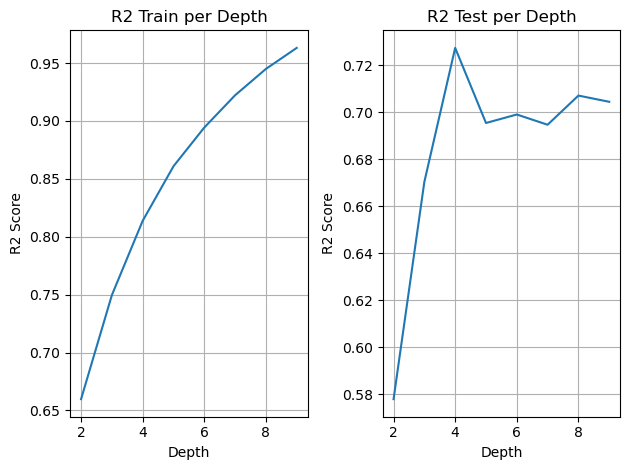

Good depths: [3, 4, 5, 6, 7, 8, 9]
Best depths: []


In [25]:
depth_finder(X_train_tf, X_test_tf, y_train, y_test)